---
# Loan Payment Status Prediction
---

## Table of Contents
---
1. [Loading and Setup](#loadingandsetup)
2. [Assessment](#assessment)
3. [EDA](#eda)

In this notebook, we are going to exame the dataset more and visualize the results.

## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
# Load the dataset
df = pd.read_parquet('dataset/LoanData_after_DataCleaning.parquet')

## Assessment <a class="anchor" id="assessment"></a>

In [13]:
# Print the shape of the data
df.shape

(21015, 29)

In [14]:
# # Print the first 5 rows of the dataset
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,Individual
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,Individual
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,Individual
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,Individual
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,...,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,Individual


In [15]:
# Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21015 entries, 0 to 22509
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            21015 non-null  float64
 1   funded_amnt          21015 non-null  float64
 2   funded_amnt_inv      21015 non-null  float64
 3   term                 21015 non-null  object 
 4   int_rate             21015 non-null  float64
 5   installment          21015 non-null  float64
 6   grade                21015 non-null  object 
 7   sub_grade            21015 non-null  object 
 8   emp_title            21015 non-null  object 
 9   emp_length           21015 non-null  object 
 10  home_ownership       21015 non-null  object 
 11  annual_inc           21015 non-null  float64
 12  verification_status  21015 non-null  object 
 13  loan_status          21015 non-null  object 
 14  purpose              21015 non-null  object 
 15  addr_state           21015 non-null 

Methodology:

The provided information is a summary of a pandas DataFrame with 21,015 entries (rows) and 29 columns. The DataFrame has undergone some data preprocessing or filtering, and the output represents the current state of the DataFrame after these operations. 

1. Filtering and Data Preprocessing: The initial DataFrame had 22,510 entries, but some rows have been removed during data cleaning steps. As a result, the DataFrame now contains 21,015 entries.
2. Columns and Data Types: The DataFrame contains 29 columns in total, with 16 columns having a numerical data type (float64) and 13 columns having an object data type. The numerical columns likely represent continuous or discrete numeric features, while the object columns may contain categorical or string-based data.
3. Non-Null Counts: For each column, the summary shows the number of non-null entries, which represents the count of valid (non-missing) values in the corresponding column. This information indicates that there are no missing values in any of the 29 columns, as the non-null count for each column matches the total number of entries in the DataFrame (21,015).

Findings:

1. The DataFrame has been preprocessed or filtered to contain 21,015 entries (rows) out of the initial 22,511 entries. 
2. The DataFrame contains 29 columns, consisting of 16 numerical columns and 13 object (categorical or string) columns.
3. There are no missing values in any of the columns, as the non-null counts for all 29 columns match the total number of entries (21,015).

In [16]:
# Get a statistical summary of the dataset
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,2.101500e+04,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000
mean,15247.552938,15247.552938,15241.224126,12.254598,441.629202,8.003775e+04,19.317213,0.338330,694.943850,698.943945,0.608232,12.226315,0.232072,17674.564454,51.906013,25.616227
std,8758.640338,8758.640338,8753.737831,4.210099,250.163947,6.237186e+04,8.766120,0.886337,31.055581,31.056042,0.889796,5.792745,0.639771,23093.748226,24.112053,12.192821
min,1000.000000,1000.000000,1000.000000,5.320000,30.540000,3.800000e+03,0.000000,0.000000,660.000000,664.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,8000.000000,8000.000000,8000.000000,9.170000,258.700000,5.000000e+04,12.690000,0.000000,670.000000,674.000000,0.000000,8.000000,0.000000,6379.500000,33.900000,17.000000
50%,14000.000000,14000.000000,14000.000000,11.990000,384.920000,6.946000e+04,18.790000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,12074.000000,51.800000,24.000000
75%,20400.000000,20400.000000,20400.000000,14.480000,589.785000,9.600000e+04,25.560000,0.000000,710.000000,714.000000,1.000000,15.000000,0.000000,21499.000000,70.300000,32.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1354.660000,3.964280e+06,136.970000,15.000000,845.000000,850.000000,5.000000,65.000000,23.000000,647310.000000,134.300000,111.000000


## EDA <a class="anchor" id="eda"></a>

Let's prints the unique values present in the 'loan_status' column, which represents the different loan statuses in the dataset:

In [17]:
print(df['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)']


The following calculates the count of each unique value in the 'loan_status' column, giving us the number of loans in each loan status category:

In [18]:
# Get the count of each unique value in 'loan_status' column
df['loan_status'].value_counts()

Fully Paid            14838
Charged Off            3711
Current                2285
Late (31-120 days)      116
In Grace Period          53
Late (16-30 days)        12
Name: loan_status, dtype: int64

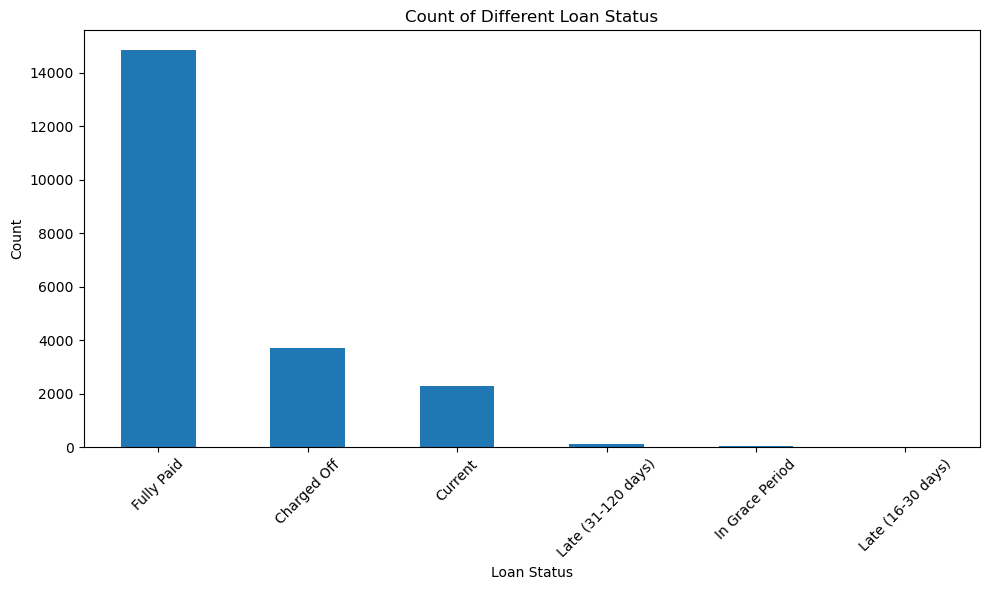

In [19]:
# Create a bar plot for the count of each unique value in 'loan_status' column
plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

The bar plot visually represents the distribution of loan statuses, showing the count of loans in each category. This plot provides an overview of the loan status distribution in the dataset.

In [20]:
# Get the percentage of each unique value in 'loan_status' column
df['loan_status'].value_counts() / len(df) * 100

Fully Paid            70.606709
Charged Off           17.658815
Current               10.873186
Late (31-120 days)     0.551987
In Grace Period        0.252201
Late (16-30 days)      0.057102
Name: loan_status, dtype: float64

Since the precentage of Late (16-30 days)', 'Late (31-120 days)', and 'In Grace Period' values are really low comparing to the rest of the values, let's drop those:

In [21]:
# Drop the rows with 'Late (16-30 days)', 'Late (31-120 days)', and 'In Grace Period' values in 'loan_status' column
df = df[df['loan_status'] != 'Late (16-30 days)']
df = df[df['loan_status'] != 'Late (31-120 days)']
df = df[df['loan_status'] != 'In Grace Period']

# Check the shape of the dataframe
df.shape

(20834, 29)

Since we are interested in predicting future loan status, let's combine 'Fully Paid', 'Current' into 'Paid' as we expect 'Current' to be paid off in the near future as well. Then we renamed 'Charged Off' as 'Default' for better understanding of the naming of the dataset.

In [22]:
# Create a new DataFrame with modified loan_status values
df_modified = df.copy()
df_modified['loan_status'] = df_modified['loan_status'].replace(['Fully Paid', 'Current'], 'Paid')
df_modified['loan_status'] = df_modified['loan_status'].replace(['Charged Off'], 'Default')

# Show the first 5 rows of the modified DataFrame
df_modified.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,Individual
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,Individual
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,Individual
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,Individual
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,...,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,Individual


In [23]:
# Get the count of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts()

Paid       17123
Default     3711
Name: loan_status, dtype: int64

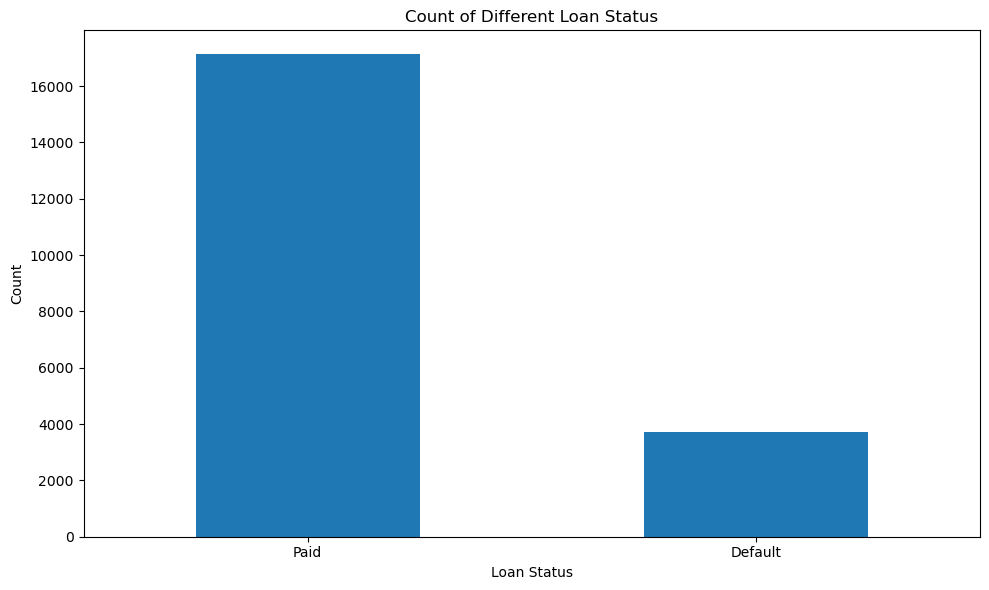

In [24]:
# Create a bar plot for count of values in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
df_modified['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
# Get the percentage of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts() / len(df_modified) * 100

Paid       82.18777
Default    17.81223
Name: loan_status, dtype: float64

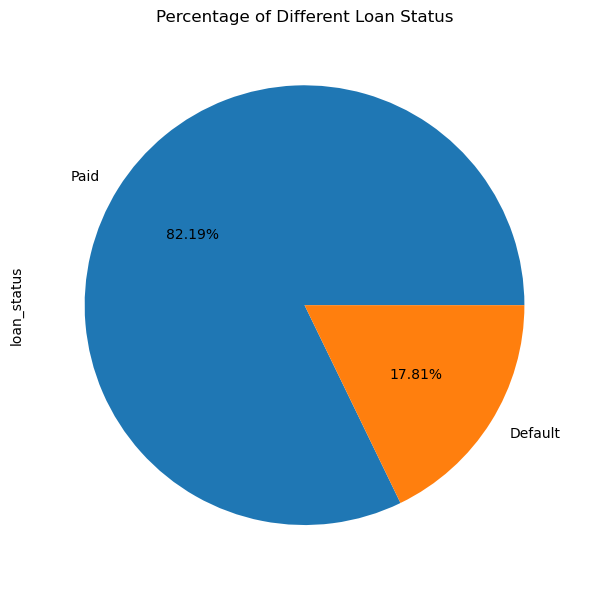

In [26]:
# Create a pie chart for the percentage of each unique value in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
loan_status_counts = df_modified['loan_status'].value_counts()
loan_status_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Percentage of Different Loan Status')
plt.tight_layout()
plt.show()

82.19% of the loan in our dataset is paid, and 17.81% of the loan is default.

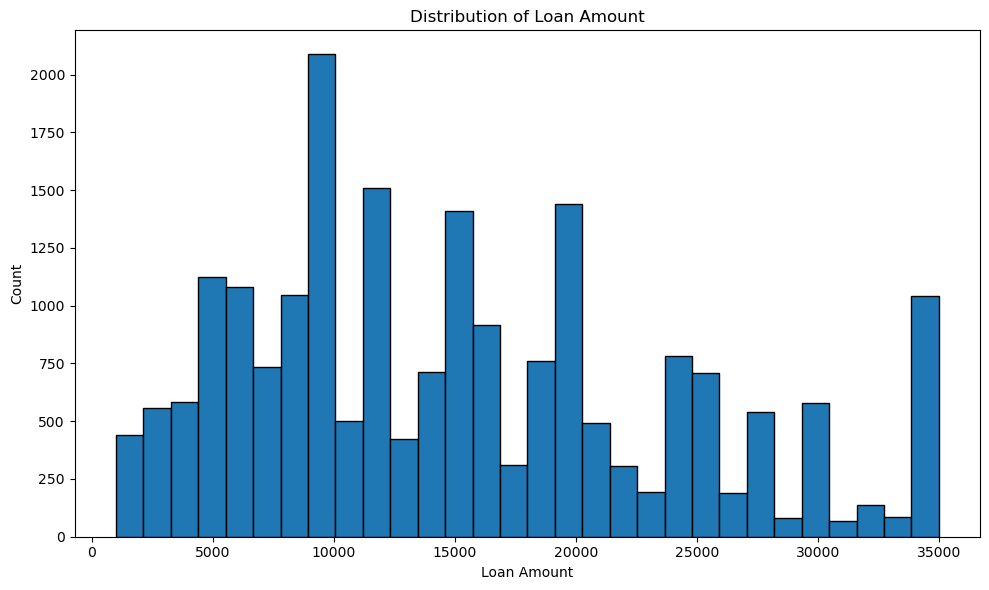

In [27]:
# Plot a histogram for the 'loan_amnt' column
plt.figure(figsize=(10, 6))
plt.hist(df_modified['loan_amnt'], bins=30, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.tight_layout()
plt.show()

The histogram shows the distribution of loan amounts in the dataset: 
- Most of the loans are in the range of $5,000 to $20,000.

In [29]:
# Checking the correlation among columns
df_modified.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
loan_amnt,1.000000,1.000000,0.999994,0.165316,0.943674,0.326729,0.039956,-0.037570,0.121377,0.121372,-0.022722,0.181298,-0.071383,0.328374,0.119163,0.199929
funded_amnt,1.000000,1.000000,0.999994,0.165316,0.943674,0.326729,0.039956,-0.037570,0.121377,0.121372,-0.022722,0.181298,-0.071383,0.328374,0.119163,0.199929
funded_amnt_inv,0.999994,0.999994,1.000000,0.164705,0.943645,0.326842,0.039725,-0.037631,0.121677,0.121672,-0.022816,0.181266,-0.071433,0.328391,0.118970,0.199959
int_rate,0.165316,0.165316,0.164705,1.000000,0.143793,-0.108507,0.222624,0.035244,-0.388214,-0.388212,0.249890,-0.015915,0.071544,-0.054173,0.203092,-0.040721
installment,0.943674,0.943674,0.943645,0.143793,1.000000,0.322791,0.022753,-0.027636,0.080188,0.080183,0.004330,0.162001,-0.057605,0.308607,0.121654,0.173692
annual_inc,0.326729,0.326729,0.326842,-0.108507,0.322791,1.000000,-0.204035,0.031354,0.086819,0.086820,0.022567,0.132906,0.008983,0.328589,0.053167,0.194596
dti,0.039956,0.039956,0.039725,0.222624,0.022753,-0.204035,1.000000,-0.015256,-0.058059,-0.058063,0.007326,0.291393,-0.065650,0.146984,0.164879,0.232656
delinq_2yrs,-0.037570,-0.037570,-0.037631,0.035244,-0.027636,0.031354,-0.015256,1.000000,-0.175813,-0.175811,0.035327,0.024311,-0.020762,-0.034697,-0.016219,0.100278
fico_range_low,0.121377,0.121377,0.121677,-0.388214,0.080188,0.086819,-0.058059,-0.175813,1.000000,1.000000,-0.140465,0.045324,-0.202158,0.036564,-0.426270,0.037131
fico_range_high,0.121372,0.121372,0.121672,-0.388212,0.080183,0.086820,-0.058063,-0.175811,1.000000,1.000000,-0.140463,0.045324,-0.202156,0.036562,-0.426269,0.037130


<Axes: >

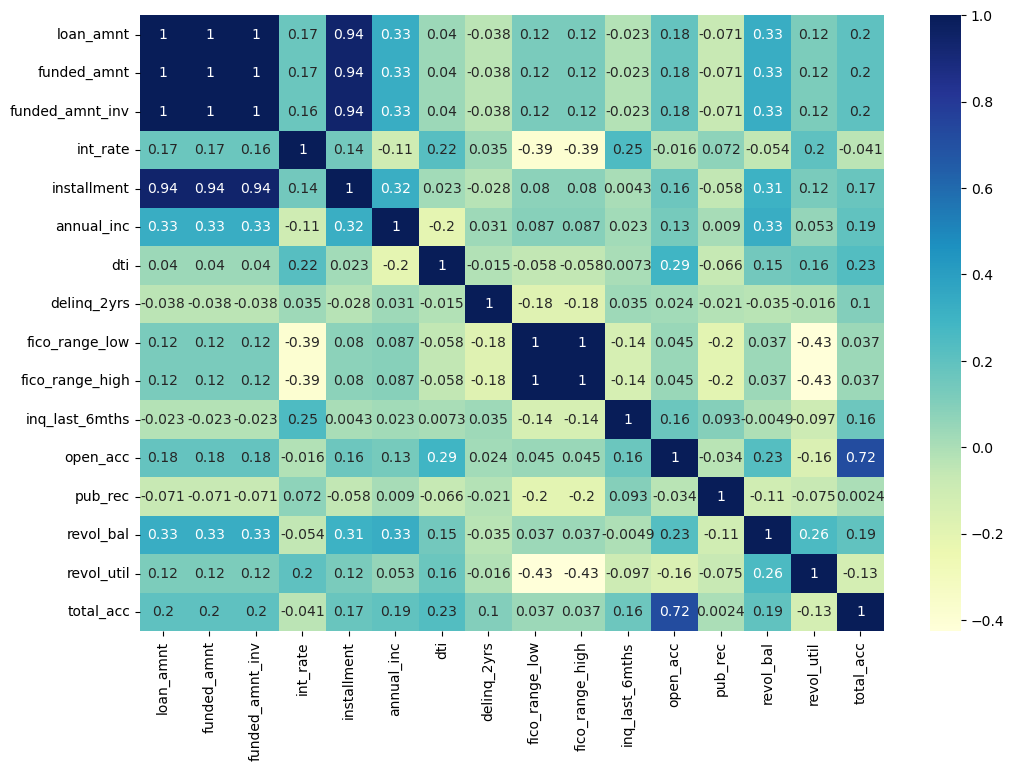

In [30]:
# Plotting correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_modified.corr(), annot=True, cmap='YlGnBu')

There is high correlation between loan_amnt, funded_amnt, funded_amnt_inv and installment.

<Axes: xlabel='installment', ylabel='loan_amnt'>

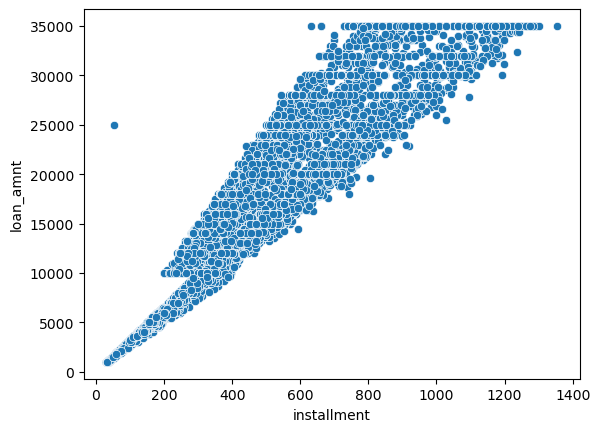

In [32]:
# Plottting a scatterplot between 'installment' and 'loan_amnt' columns
sns.scatterplot(x='installment', y='loan_amnt', data=df_modified)

It is interesting to notice there is one outliner at loan_amnt = 250,000 when installment is between 0 and 200.

<Axes: xlabel='installment', ylabel='funded_amnt'>

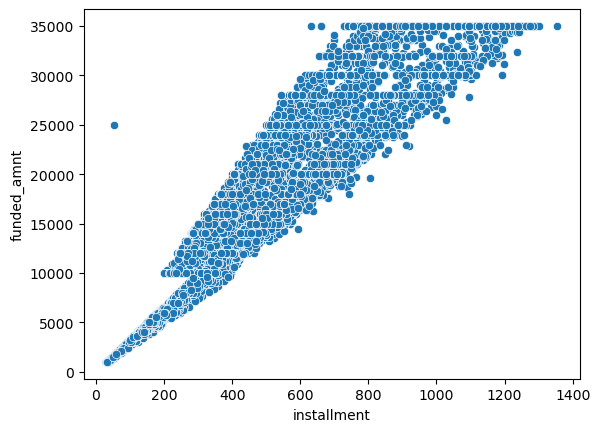

In [33]:
# Plottting a scatterplot between 'installment' and 'funded_amnt' columns
sns.scatterplot(x='installment', y='funded_amnt', data=df_modified)

<Axes: xlabel='installment', ylabel='funded_amnt_inv'>

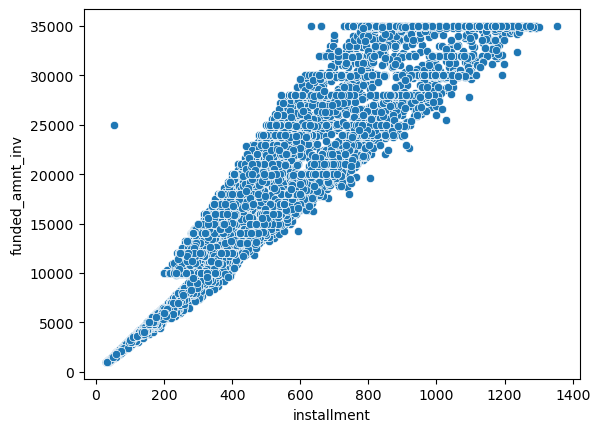

In [ ]:
# Plottting a scatterplot between 'installment' and 'funded_amnt_inv' columns
sns.scatterplot(x='installment', y='funded_amnt_inv', data=df_modified)

As we can see, loan_amnt, funded_amnt, funded_amnt_inv are basically the same amount, so that their graphs are exactly identical. Basically it means whhatever loan amount the borrower applied for, LendingClub is mostly likely to grant the same amount of loan to the borrower.

In [39]:
#checking the installment column as it's having high corr
df_modified['installment'].describe()

count    20834.000000
mean       441.169325
std        250.437800
min         30.540000
25%        257.390000
50%        383.830000
75%        589.242500
max       1354.660000
Name: installment, dtype: float64

<Axes: >

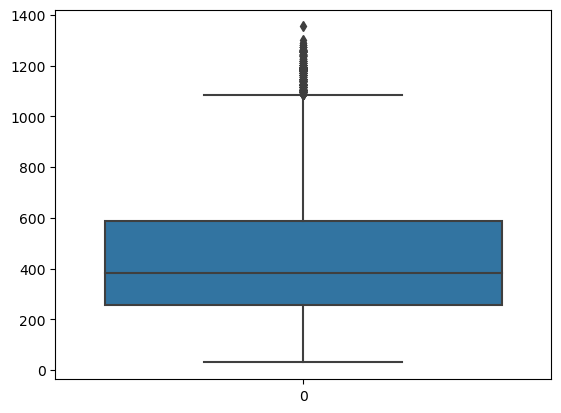

In [40]:
# Plot a boxplot for the column
sns.boxplot(df_modified['installment'])

In [41]:
# Calculate the upper bound and lower bound of the 'installment' column
q1 = df_modified['installment'].quantile(0.25)
q3 = df_modified['installment'].quantile(0.75)

iqr = q3 - q1

ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)

print(f'upper bound: {ub}\nlower bound: {lb}')

upper bound: 1087.0212500000002
lower bound: -240.38875000000013


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

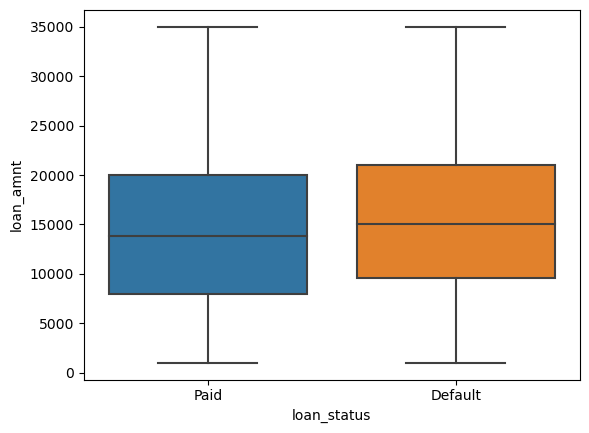

In [42]:
# Checking the correlation using boxplot
sns.boxplot(data=df_modified, x='loan_status', y='loan_amnt')

Both Paid and Default loans have an average loan amount of around 15000.

In [43]:
# describe the column
df_modified.groupby(['loan_status']).describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Default        3711.0  16035.859607  8692.708354  1000.0  9600.0  15000.0   
Paid          17123.0  15029.108509  8761.847469  1000.0  8000.0  13800.0   

                              funded_amnt                ... revol_util  \
                 75%      max       count          mean  ...        75%   
loan_status                                              ...              
Default      21000.0  35000.0      3711.0  16035.859607  ...       72.3   
Paid         20000.0  35000.0     17123.0  15029.108509  ...       69.9   

                   total_acc                                               \
               max     count       mean        std  min   25%   50%   75%   
loan_status                                                                 
Default      108.8    3711.0  25.791970  12.609535  4.0  17.0  24.0  33.0   
Paid         134.3   17123.0  25.553758  12.088447  4.0  17.0  24.0  32.0   

                    
               max  
loan_status         
Default      111.0  
Paid         105.0  

[2 rows x 128 columns]

In [44]:
# Let's explore grade column 
grade = list(df_modified['grade'].unique())
sorted(grade)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [45]:
# sort sub_grade
sorted(list(df_modified['sub_grade'].unique()))

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

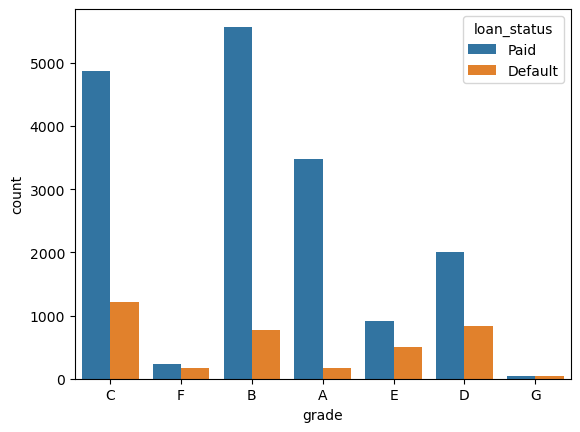

In [46]:
# Countplot per grade
sns.countplot(data=df_modified, x = 'grade', hue='loan_status')

The higher the grade of the loan, the more likely it is to be repaid. This is expected as higher grade loans are more likely to be given to borrowers with higher credit scores.

### emp_length feature

Let's plot the emp_length feature column.

In [18]:
# sort the unique values of emp_length
sorted(df_modified['emp_length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<Axes: xlabel='emp_length', ylabel='count'>

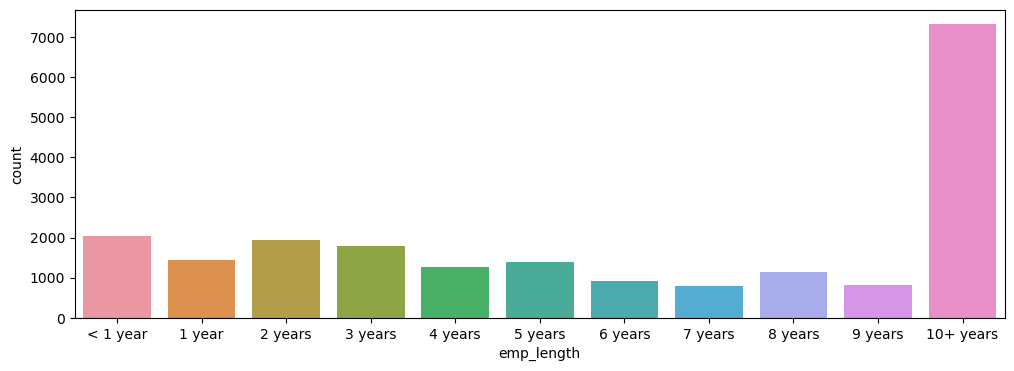

In [19]:
# plot the countplot per grade
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

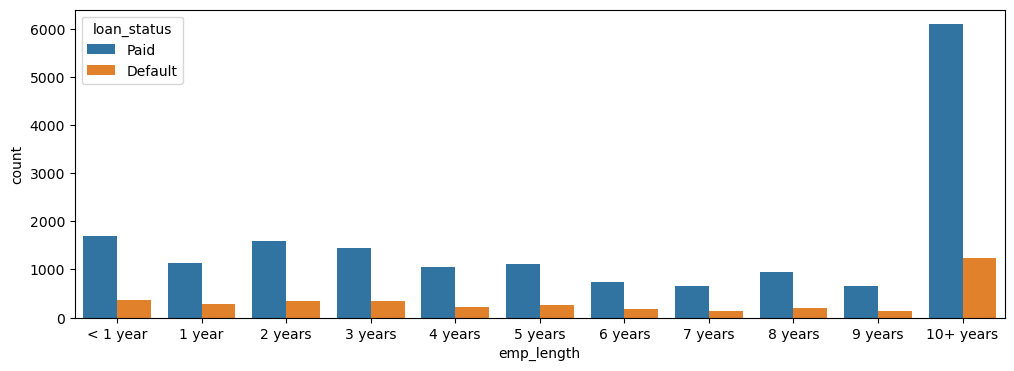

In [20]:
# plot the countplot per loan_status, with the color hue defined by the loan_status column.
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df_modified,order=emp_length_order,hue='loan_status')

It seems that the longer the borrower have been involved in the workforce, the more likely they are going to pay off the loan.

But, let's further visualize what percent of people per employment category didn't pay back their loan.

In [21]:
# caculate the ratio of default to paid for each emp_length
emp_default = df_modified[df_modified['loan_status']=="Default"].groupby("emp_length").count()['loan_status']

emp_paid = df_modified[df_modified['loan_status']=="Paid"].groupby("emp_length").count()['loan_status']

emp_len = emp_default/emp_paid

emp_len

emp_length
1 year       0.254593
10+ years    0.203087
2 years      0.215760
3 years      0.234525
4 years      0.210930
5 years      0.241472
6 years      0.229620
7 years      0.192424
8 years      0.219851
9 years      0.220365
< 1 year     0.213863
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

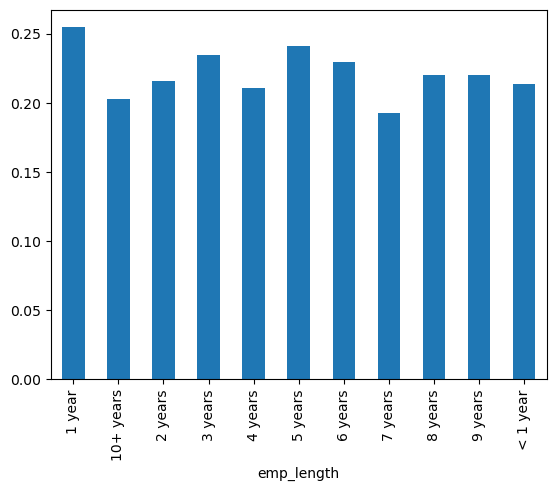

In [22]:
# plot emp_len 
emp_len.plot(kind='bar')

However, as we can see, the default rates are not much different across all employment lengths. Therefore, let's drop the emp_length column.

In [53]:
df_modified = df_modified.drop('emp_length',axis=1)

### Save the dataset

In [24]:
# Save the data to a parquet file
df_modified.to_parquet('dataset/LoanData_after_EDA.parquet')